In [1]:
#Importar las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel, mutual_info_classif
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
#Cargar los datos
df =pd.read_excel('Datos_Agrarios_Modelo.xlsx')

In [3]:
#Observar los primeros registros
df.head()

,rango precio,municipio,categoria,evapotranspiración,temperatura,textura,altura,ph,agrupación funcional,unidad de suelo,...,clima,valor potencial inicial,valor potencial final,clase unidad fisica homogenea,rango unidad fisica homogenea,rango idh,aptitutd aguacate,aptitud banano,aptitud café,aptitud platano
0,Mayor a 30 - hasta 40,Quimbaya,Incluida,0.5 - 1,18-24,Franco limosa,1000-2000,5.1,PQ19b,PQ19,...,Templado húmedo,75,70,3,73,"0,77 - 0,99",0,0,0,0
1,Mayor a 30 - hasta 40,Quimbaya,Incluida,0.5 - 1,18-24,Franco limosa,1000-2000,5.1,PQ19b,PQ19,...,Templado húmedo,75,70,3,73,"0,77 - 0,99",0,0,1,0
2,Mayor a 30 - hasta 40,Quimbaya,Incluida,0.5 - 1,18-24,Franco limosa,1000-2000,5.1,PQ19b,PQ19,...,Templado húmedo,75,70,3,73,"0,77 - 0,99",0,1,0,1
3,Mayor a 30 - hasta 40,Quimbaya,Incluida,0.5 - 1,18-24,Franco limosa,1000-2000,5.1,PQ19b,PQ19,...,Templado húmedo,75,70,3,73,"0,77 - 0,99",0,1,1,1
4,Mayor a 10 - hasta 15,Salento,Condicionada,0.25 - 0.5,18-24,Franco arenosa,1000-2000,5.6,MQ65f2,MQ65,...,Templado muy húmedo,74,32,10,30,"0,77 - 0,99",1,1,1,1


In [4]:
#Observar los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rango precio                   2389 non-null   object 
 1   municipio                      2389 non-null   object 
 2   categoria                      2389 non-null   object 
 3   evapotranspiración             2389 non-null   object 
 4   temperatura                    2389 non-null   object 
 5   textura                        2389 non-null   object 
 6   altura                         2389 non-null   object 
 7   ph                             2389 non-null   float64
 8   agrupación funcional           2389 non-null   object 
 9   unidad de suelo                2389 non-null   object 
 10  taxonomia                      2389 non-null   object 
 11  perfil                         2389 non-null   object 
 12  intercambio cationico          2389 non-null   f

In [5]:
#Estadisticas descriptivas
df.describe()

,ph,intercambio cationico,monoxido de carbono,corriente electrica,acidez intercambiable,valor potencial inicial,valor potencial final,clase unidad fisica homogenea,rango unidad fisica homogenea,aptitutd aguacate,aptitud banano,aptitud café,aptitud platano
count,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000
mean,5.610046,15.799791,7.436949,719.894517,6.940017,74.506907,48.977396,6.990791,48.745500,0.349100,0.468815,0.472583,0.488489
std,0.352033,25.328647,2.738534,2585.106278,13.280551,5.452365,17.469101,3.010854,18.491694,0.476785,0.499131,0.499352,0.499972
min,4.500000,0.000000,1.000000,0.000000,0.000000,53.000000,20.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,5.300000,0.000000,6.000000,0.000000,0.000000,73.000000,33.000000,4.000000,30.000000,0.000000,0.000000,0.000000,0.000000
50%,5.600000,0.000000,6.000000,0.000000,0.000000,77.000000,46.000000,8.000000,44.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,35.000000,9.000000,0.000000,4.700000,77.000000,69.000000,10.000000,67.000000,1.000000,1.000000,1.000000,1.000000
max,6.100000,85.000000,26.000000,9999.000000,52.000000,89.000000,80.000000,13.000000,80.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#Eliminar las filas con rangos de precio demasiado alto o demasiado bajos
# Lista de valores a eliminar
valores_a_eliminar = [
    'Mayor a 1 - hasta 2', 
    'Mayor a 3 - hasta 5',
    'Mayor a 8 - hasta 10',
    'Mayor a 100 - hasta 120',
    'Mayor a 120 - hasta 140',
    'Mayor a 140 - hasta 160',
    'Mayor a 160 - hasta 180',
    'Mayor a 180 - hasta 200',
    'Mayor a 550 - hasta 600',
    'Mayor a 650 - hasta 700'
]

# Eliminar las filas que contienen esos valores en la columna 'rango precio'
df2 = df[~df['rango precio'].isin(valores_a_eliminar)]

# Restablecer los índices después de filtrar
df2 = df2.reset_index(drop=True)

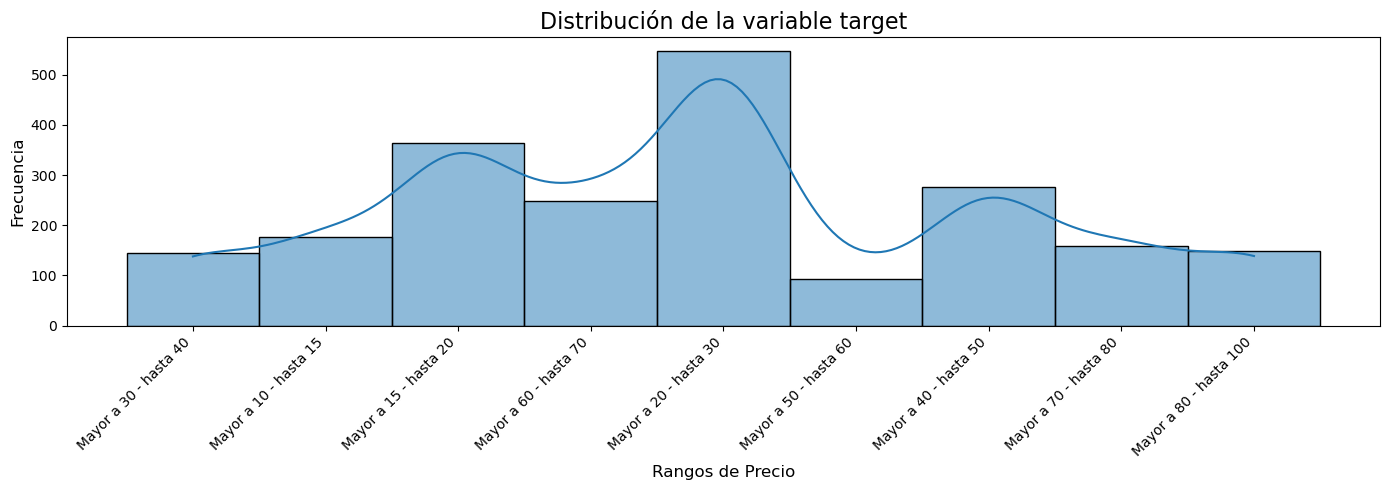

In [7]:
# Crear la figura y el eje
f, ax = plt.subplots(figsize=(14, 5))

# Histograma de la variable target con función de densidad
sns.histplot(df2['rango precio'], kde=True, ax=ax)

# Ajustes estéticos del gráfico
ax.set_title('Distribución de la variable target', fontsize=16)
ax.set_xlabel('Rangos de Precio', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)

# Rotar las etiquetas del eje X
plt.xticks(rotation=45, ha='right', fontsize=10)

# Mejorar el ajuste de los elementos en la figura
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [8]:
#Obtener la lista de variables categoricas
variables_categoricas = df2.select_dtypes(include=['object']).columns.tolist()
variables_categoricas.remove('rango precio')
variables_categoricas

['municipio',
 'categoria',
 'evapotranspiración',
 'temperatura',
 'textura',
 'altura',
 'agrupación funcional',
 'unidad de suelo',
 'taxonomia',
 'perfil',
 'limitante',
 'profundidad',
 'humedad',
 'inundaciones',
 'drenaje',
 'pendiente',
 'perdida de suelo',
 'clima',
 'rango idh']

In [9]:
# Crear el objeto StandardScaler
scaler = StandardScaler()

# Copiar el dataframe para no modificar el original
df_scaled = df2.copy()

# Seleccionar solo las columnas numéricas
numerical_columns = df_scaled.select_dtypes(include=['float64', 'int64']).columns

# Aplicar el StandardScaler solo a las columnas numéricas
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])

# Verificar las primeras filas del dataframe estandarizado
df_scaled.head()

,rango precio,municipio,categoria,evapotranspiración,temperatura,textura,altura,ph,agrupación funcional,unidad de suelo,...,clima,valor potencial inicial,valor potencial final,clase unidad fisica homogenea,rango unidad fisica homogenea,rango idh,aptitutd aguacate,aptitud banano,aptitud café,aptitud platano
0,Mayor a 30 - hasta 40,Quimbaya,Incluida,0.5 - 1,18-24,Franco limosa,1000-2000,-1.397066,PQ19b,PQ19,...,Templado húmedo,0.120672,1.319309,-1.444283,1.429105,"0,77 - 0,99",-0.789319,-0.950681,-0.951566,-0.985730
1,Mayor a 30 - hasta 40,Quimbaya,Incluida,0.5 - 1,18-24,Franco limosa,1000-2000,-1.397066,PQ19b,PQ19,...,Templado húmedo,0.120672,1.319309,-1.444283,1.429105,"0,77 - 0,99",-0.789319,-0.950681,1.050900,-0.985730
2,Mayor a 30 - hasta 40,Quimbaya,Incluida,0.5 - 1,18-24,Franco limosa,1000-2000,-1.397066,PQ19b,PQ19,...,Templado húmedo,0.120672,1.319309,-1.444283,1.429105,"0,77 - 0,99",-0.789319,1.051877,-0.951566,1.014477
3,Mayor a 30 - hasta 40,Quimbaya,Incluida,0.5 - 1,18-24,Franco limosa,1000-2000,-1.397066,PQ19b,PQ19,...,Templado húmedo,0.120672,1.319309,-1.444283,1.429105,"0,77 - 0,99",-0.789319,1.051877,1.050900,1.014477
4,Mayor a 10 - hasta 15,Salento,Condicionada,0.25 - 0.5,18-24,Franco arenosa,1000-2000,0.046444,MQ65f2,MQ65,...,Templado muy húmedo,-0.062244,-0.915835,0.944765,-0.959286,"0,77 - 0,99",1.266915,1.051877,1.050900,1.014477


In [10]:
# Paso 1: Separar las variables numéricas y categóricas
numerical_columns = df_scaled.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Paso 2: Codificar las variables categóricas
df_encoded = df_scaled.copy()
for col in variables_categoricas:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Paso 3: Combinar las numéricas y categóricas codificadas
X_encoded = df_encoded[numerical_columns + variables_categoricas]
y = df_encoded['rango precio']

# Paso 4: Calcular la relevancia usando Information Gain
info_gain_scores = mutual_info_classif(X_encoded, y)

# Paso 5: Crear un DataFrame con los puntajes
feature_importances = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': info_gain_scores
})

# Ordenar las características por importancia
features_df = feature_importances.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(features_df)

                          Feature  Importance
19           agrupación funcional    0.937902
13                      municipio    0.758281
6           valor potencial final    0.725590
20                unidad de suelo    0.668657
22                         perfil    0.575802
21                      taxonomia    0.506756
5         valor potencial inicial    0.482631
7   clase unidad fisica homogenea    0.449191
8   rango unidad fisica homogenea    0.441017
28                      pendiente    0.405857
0                              ph    0.364707
17                        textura    0.247325
24                    profundidad    0.216150
4           acidez intercambiable    0.214053
1           intercambio cationico    0.205458
2             monoxido de carbono    0.192863
23                      limitante    0.166933
30                          clima    0.161874
14                      categoria    0.119627
16                    temperatura    0.101491
18                         altura 

In [11]:
# Seleccionar las características más importantes
top_features = features_df.head(20)

# Seleccionar solo las 16 características más importantes de X_encoded
X_selected = X_encoded[top_features['Feature']]

# Verificar las primeras filas del nuevo conjunto de datos
X_selected

,agrupación funcional,municipio,valor potencial final,unidad de suelo,perfil,taxonomia,valor potencial inicial,clase unidad fisica homogenea,rango unidad fisica homogenea,pendiente,ph,textura,profundidad,acidez intercambiable,intercambio cationico,monoxido de carbono,limitante,clima,categoria,temperatura
0,17,10,1.319309,10,17,10,0.120672,-1.444283,1.429105,3,-1.397066,5,0,-0.541692,-0.654133,-0.560288,3,4,1,1
1,17,10,1.319309,10,17,10,0.120672,-1.444283,1.429105,3,-1.397066,5,0,-0.541692,-0.654133,-0.560288,3,4,1,1
2,17,10,1.319309,10,17,10,0.120672,-1.444283,1.429105,3,-1.397066,5,0,-0.541692,-0.654133,-0.560288,3,4,1,1
3,17,10,1.319309,10,17,10,0.120672,-1.444283,1.429105,3,-1.397066,5,0,-0.541692,-0.654133,-0.560288,3,4,1,1
4,9,11,-0.915835,7,2,7,-0.062244,0.944765,-0.959286,4,0.046444,4,1,-0.195604,0.705568,0.529493,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152,6,6,1.084031,5,3,5,2.315667,-1.102991,1.095841,1,0.335146,2,1,0.386118,0.328736,-1.744518,3,5,1,1
2153,6,6,1.084031,5,3,5,2.315667,-1.102991,1.095841,1,0.335146,2,1,0.386118,0.328736,-1.744518,3,5,1,1
2154,6,6,1.084031,5,3,5,2.315667,-1.102991,1.095841,1,0.335146,2,1,0.386118,0.328736,-1.744518,3,5,1,1
2155,6,6,1.084031,5,3,5,2.315667,-1.102991,1.095841,1,0.335146,2,1,0.386118,0.328736,-1.744518,3,5,1,1


In [12]:
# Parámetro para decidir si aplicar PCA
apply_pca = False  # Cambiar a False si no deseas usar PCA

# Si apply_pca es True, aplicar PCA
if apply_pca:
    # Crear el objeto PCA y ajustar el número de componentes
    pca = PCA(n_components=18)

    # Aplicar PCA a los datos seleccionados
    X_selected = pca.fit_transform(X_selected)

    # Verificar el resultado del PCA (las primeras filas)
    print("PCA aplicado:")
    print(X_selected[:3])  # Imprimir las primeras 5 filas para ver los componentes principales
else:
    print("PCA no aplicado.")

PCA no aplicado.


In [13]:
# Asegúrate de que X_selected y y son pandas DataFrame/Series
X_selected = pd.DataFrame(X_selected)
y = pd.Series(y)

# Parámetros
bootstrap = True
random_state = 42

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)

# Bucle de validación cruzada
for train_index, test_index in kf.split(X_selected, y):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Aplicar Bootstrap al conjunto de entrenamiento
    if bootstrap:
        X_train, y_train = resample(X_train, y_train, replace=True, random_state=random_state)

    # Entrenar el modelo
    gb_model = GradientBoostingClassifier(random_state=random_state)
    gb_model.fit(X_train, y_train)
    
    # Evaluar el modelo
    y_pred = gb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6944
Accuracy: 0.7037
Accuracy: 0.6852
Accuracy: 0.6574
Accuracy: 0.7315
Accuracy: 0.7176
Accuracy: 0.6806
Accuracy: 0.7302
Accuracy: 0.6744
Accuracy: 0.7488


In [14]:
# Crear el modelo de Random Forest
rf = RandomForestClassifier(
    n_estimators=31, 
    max_depth=10, 
    max_features=4, 
    min_samples_split=15, 
    random_state=42
)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = rf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Obtener las importancias de las características
importances_rf = rf.feature_importances_

# Crear un DataFrame para mostrar las importancias
importances_df_rf = pd.DataFrame({
    'Feature': X_train.columns,  
    'Importance': importances_rf
})

# Ordenar las características por importancia
importances_df_rf = importances_df_rf.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(importances_df_rf.head(10))  


Accuracy: 0.7349
                          Feature  Importance
1                       municipio    0.182955
0            agrupación funcional    0.095197
3                 unidad de suelo    0.072927
18                      categoria    0.067385
17                          clima    0.064901
2           valor potencial final    0.060356
7   clase unidad fisica homogenea    0.056033
5                       taxonomia    0.051357
8   rango unidad fisica homogenea    0.041370
12                    profundidad    0.041105


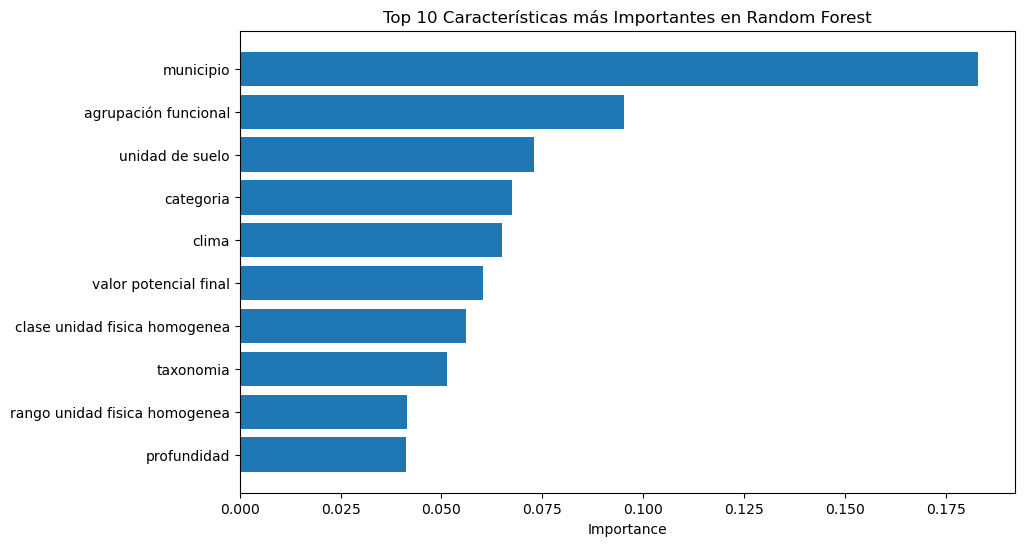

In [15]:
# Visualizar las 10 características más importantes en Random Forest
plt.figure(figsize=(10, 6))
plt.barh(importances_df_rf['Feature'].head(10), importances_df_rf['Importance'].head(10))
plt.xlabel('Importance')
plt.title('Top 10 Características más Importantes en Random Forest')
plt.gca().invert_yaxis()  
plt.show()

In [16]:
# Crear el modelo de Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Entrenar el modelo
gb.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred_gb = gb.predict(X_test)

# Evaluar el modelo
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy (Gradient Boosting): {accuracy_gb:.4f}')

# Obtener las importancias de las características
importances_gb = gb.feature_importances_

# Crear un DataFrame para mostrar las importancias
importances_df_gb = pd.DataFrame({
    'Feature': X_train.columns,  
    'Importance': importances_gb
})

# Ordenar las características por importancia
importances_df_gb = importances_df_gb.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(importances_df_gb.head(10))  # Mostrar las 10 más importantes

Accuracy (Gradient Boosting): 0.7488
                          Feature  Importance
1                       municipio    0.214041
12                    profundidad    0.119822
2           valor potencial final    0.106989
0            agrupación funcional    0.105942
3                 unidad de suelo    0.072841
9                       pendiente    0.049539
18                      categoria    0.049262
4                          perfil    0.043717
17                          clima    0.042917
7   clase unidad fisica homogenea    0.036370


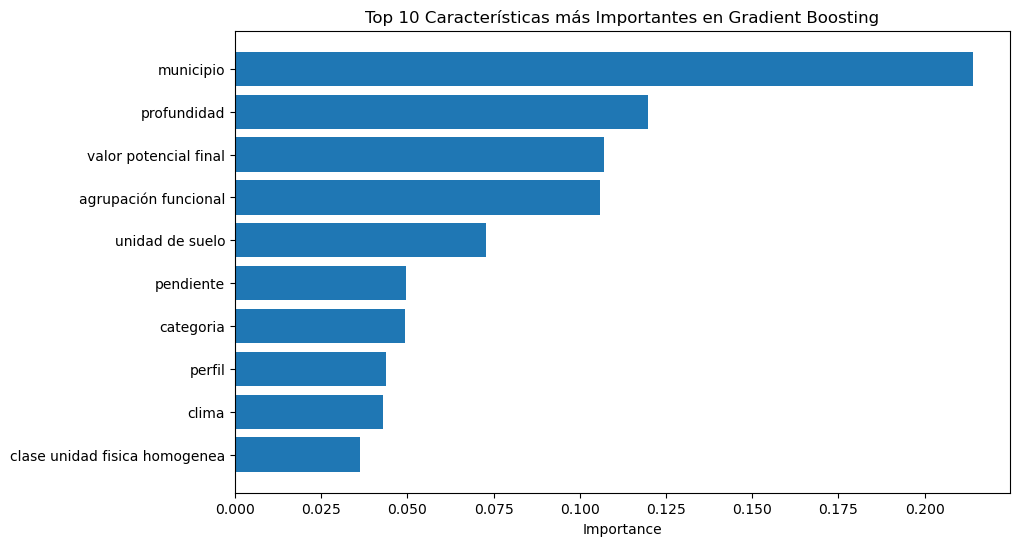

In [17]:
# Visualizar las 10 características más importantes en Gradient Boosting
plt.figure(figsize=(10, 6))
plt.barh(importances_df_gb['Feature'].head(10), importances_df_gb['Importance'].head(10))
plt.xlabel('Importance')
plt.title('Top 10 Características más Importantes en Gradient Boosting')
plt.gca().invert_yaxis()  # Para que la más importante esté arriba
plt.show()